# Meta-Analyze Results from Harassment Prevention Studies on Reddit, 2016-2020
J. Nathan Matias, July 2022

This file meta-analyzes results from multiple studies conducted with Reddit communities from 2016-2020. Important links include:

* [Pre-analysis plan for these studies](https://osf.io/ymv9h/)
* [Community recruitment drive](https://citizensandtech.org/2019/03/reddit-mods-prevent-harassment-fact-checkinglets-test-ideas/) fron 2019
* [CAT Lab Research page](https://citizensandtech.org/research/how-can-we-prevent-online-harassment-and-other-unruly-behavior-on-reddit/)


Data sources:
* `reddit-ffxiv-analysis-2020.ipynb`
* `reddit-science-analysis-2022.ipynb`
* `/Users/nathan/Dropbox (MIT)/Apps/ShareLaTeX/PNAS r_science experimentarchive/community-experiments.Rtex`
  * *exs.posts*: posts in the experiment
  * *pre.posts*: posts from before the experiment
  

### Intervention Messages from Experiments:
* `r/science 2016`: 
  * Welcome to r/science! Our team of 1,500+ moderators will remove comments if they are jokes, memes, off-topic, or medical advice ([rules](https://www.reddit.com/r/science/wiki/rules#wiki_comment_rules)). We encourage respectful discussion.
* `r/science 2020`:
  * Welcome to r/science! Our team of 1,500+ moderators will remove comments if they are jokes, anecdotes, memes, off-topic or medical advice ([rules](https://www.reddit.com/r/science/wiki/rules#wiki_comment_rules)). We encourage respectful discussion about the science of the post.
* `r/ffxiv 2019`:
  * Welcome to /r/ffxiv! [Gyorin the Gunbreaker](https://i.imgur.com/JOCYoDP.png) asks you to keep in mind [Reddiquette](https://www.reddit.com/wiki/reddiquette/), follow [our community rules](https://www.reddit.com/r/ffxiv/about/rules/), and be civil with your fellow Warriors of Light.<br/><br/>
  Threads on bad experiences with other players (even anonymous) as well as hate-based comments such as personal attacks, bigotry, hate speech, and name shaming are subject to removal by the moderator team under rule 1. Please [report any rule violations](https://www.reddithelp.com/en/categories/rules-reporting/account-and-community-restrictions/what-does-report-button-do); the moderator team will review them as soon as possible.
* `r/futurology`:  
  * Welcome to /r/Futurology! To maintain a healthy, vibrant community, **comments will be removed if they are disrespectful, off-topic, or spread misinformation** ([rules](https://www.reddit.com/r/Futurology/wiki/rules#wiki_subreddit_rules)). While thousands of people comment daily and follow the rules, mods do remove a few hundred comments per day. Replies to this announcement are auto-removed.

In [2]:
ffxiv.data.dir = "~/Tresors/CivilServant/projects/CivilServant-reddit/r-ffxiv-2020"
ffxiv.newcomer.comments.filename = "r-ffxiv-newcomer-comments-11.22.2020.csv"
ffxiv.all.comments.filename = "r-ffxiv-all-comments-11.22.2020.csv"
ffxiv.posts.filename = "r-ffxiv-posts-11.22.2020.csv"


r.science.2020.data.dir = "~/Tresors/CivilServant/projects/CivilServant-reddit/2020-r-science"
r.science.2020.all.comments.filename = "r-science-all-comments-07.07.2022.csv"
r.science.2020.newcomer.comments.filename = "r-science-newcomer-comments-07.07.2022.csv"
r.science.2020.posts.filename = "r-science-posts-06.19.2022.csv"
r.science.2020.before.after.posts.filename = "r-science-before-after-posts-06.10.2022.csv"

r.science.2017.data.dir <- "/Users/nathan/Dropbox (MIT)/Apps/ShareLaTeX/PNAS r_science experiment/"
r.science.2017.data.file <- "r_science_experiment_results_08.25.2016_09.23.2016_02.01.2019.RData"

r.science.2017.experiment.posts.data.dir <- "~/Tresors/CivilServant/projects/CivilServant-reddit/r-science-2016"
r.science.2017.experiment.posts.data.file <- "r_science_experiment_1_posts.09.26.2016.csv"

load(file.path(r.science.2017.data.dir, r.science.2017.data.file))


r.futurology.2020.data.dir = "~/Tresors/CivilServant/projects/CivilServant-reddit/2020-futurology"
r.futurology.2020.posts.filename = "r-futurology-posts-07.18.2022.csv"
r.futurology.2020.newcomer.comments.filename = "r-futurology-newcomer-comments-07.18.2022.csv"
r.futurology.2020.all.comments.filename = "r-futurology-all-comments-07.18.2022.csv"


In [3]:
library(gmodels)  # Contains CrossTable
library(estimatr) # Contains difference_in_means
library(MASS)     # Contains glm.nb
library(rms)      # Contains lrm
library(lme4)     # Contains glmer
library(lmerTest) # Includes significance testing for glmer
library(ri2)      # Randomization inference libraries
library(texreg)   # Generate tables
library(estimatr) # provides lm_robust
library(sysfonts) # to load source sans pro
library(grid)
library(gridExtra)
library(png)      # to load images
library(ggpubr)   # includes annotate_figure
library(plm)      # fixed effects models


cat.logo.filename <- "./CAT-Logo-Horizontal-social-media-preview-color.png"
logo.img <- readPNG(cat.logo.filename)
logo.pngob <- rasterGrob(logo.img)

## Set visual style
catpalette   <- c("#333333", "#ea5324", "#005073", "#7D868C", "#BDBBBB", "#F2F2F2","#F6F2EB")
chartpalette <- c("#ea5324", "#005073", "#7D868C", "#333333", "#F2F2F2","#BDBBBB", "#F6F2EB")
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

bg.whiteortransparent <- Sys.getenv('RTRANSPARENTBG','transparent')


cat.theme <-  theme_bw() +
              theme(plot.title = element_text(size=13, face="bold", color=catpalette[3]),
                    axis.title.x =element_text(size=10, hjust = -0.01, color = catpalette[1]),
                    axis.title.y =element_text(size=10, color = catpalette[1]),
                    panel.background = element_rect(fill=catpalette[6]),
                    plot.background = element_rect(fill =bg.whiteortransparent, color = NA), # bg of the plot
#                    text=element_text(size=16,  family="Source Sans Pro")                    
                   )

end.caption.text = "

Citizens & Technology Lab - citizensandtech.org
© Creative Commons International Attribution 4.0"


#critical value for 3 comparisons is 2.398
critval.3 <- 2.398
critval = 1.96

Warning message:
“package ‘estimatr’ was built under R version 3.5.2”


ERROR: Error: package or namespace load failed for ‘estimatr’:
 .onLoad failed in loadNamespace() for 'estimatr', details:
  call: NULL
  error: '.emm_register' is not an exported object from 'namespace:emmeans'


# Set up and Load Variables

In [ ]:
## pre and post experiment variables
before.posts.science.2017.df <- pre.posts

before.after.posts.science.2020.df <- read.csv(file.path(r.science.2020.data.dir, 
                                                         r.science.2020.before.after.posts.filename))

before.after.posts.science.2020.df$before_during_after <- relevel(before.after.posts.science.2020.df$before_during_after, ref="during")

In [278]:
## experiment posts

## note: omit AMA posts from the 2017 dataset
exp.posts.science.2017.df <- subset(read.csv(file.path(r.science.2017.experiment.posts.data.dir,
                                                r.science.2017.experiment.posts.data.file)), AMA=="False")

exp.posts.science.2017.df$created.date <- as.Date(exp.posts.science.2017.df$created)


exp.posts.science.2020.df <- read.csv(file.path(r.science.2020.data.dir, 
                                                         r.science.2020.posts.filename))

exp.posts.science.2020.df$created.date <- as.Date(exp.posts.science.2020.df$created)

## ffxiv
exp.posts.ffxiv.df        <- read.csv(file.path(ffxiv.data.dir, 
                                                         ffxiv.posts.filename))
exp.posts.ffxiv.df$created.date <- as.Date(exp.posts.ffxiv.df$created)
exp.newcomer.comments.ffxiv.df <- read.csv(file.path(ffxiv.data.dir, ffxiv.newcomer.comments.filename))

## futurology
exp.posts.futurology.df        <- read.csv(file.path(r.futurology.2020.data.dir, 
                                                r.futurology.2020.posts.filename))
exp.posts.futurology.df$created.date <- as.Date(exp.posts.futurology.df$created)


exp.newcomer.comments.futurology.df        <- read.csv(file.path(r.futurology.2020.data.dir, 
                                                r.futurology.2020.newcomer.comments.filename))
exp.all.comments.futurology.df        <- read.csv(file.path(r.futurology.2020.data.dir, 
                                                r.futurology.2020.all.comments.filename))

In [279]:
## make block IDs into numbers
exp.posts.science.2017.df$block.id.int <- as.numeric(gsub("nonama.block", "", exp.posts.science.2017.df$block.id))
exp.posts.science.2020.df$block.id.int <- as.numeric(gsub("block", "", exp.posts.science.2020.df$block.id))
exp.posts.ffxiv.df$block.id.int        <- as.numeric(gsub("block", "", exp.posts.ffxiv.df$block.id))
exp.posts.futurology.df$block.id.int        <- as.numeric(gsub("block", "", exp.posts.futurology.df$block.id))


outlier.block.ids <- subset(exp.posts.science.2020.df, num.comments > 8000)$block.id

In [280]:
## experiment newcomer comments
exp.newcomer.comments.science.2020.df <- read.csv(file.path(r.science.2020.data.dir, r.science.2020.newcomer.comments.filename))
exp.newcomer.comments.science.2020.df$visible.int <- as.numeric(exp.newcomer.comments.science.2020.df$visible) - 1
exp.newcomer.comments.science.2017.df <- subset(newcomer.comments, post.ama==FALSE)

In [282]:
exp.posts.science.2020.df$day.num <- as.numeric(exp.posts.science.2020.df$created.date - min(exp.posts.science.2020.df$created.date))
exp.posts.ffxiv.df$day.num        <- as.numeric(exp.posts.ffxiv.df$created.date - min(exp.posts.ffxiv.df$created.date))
exp.posts.futurology.df$day.num   <- as.numeric(exp.posts.futurology.df$created.date - min(exp.posts.futurology.df$created.date))
exp.posts.science.2017.df$day.num <- as.numeric(exp.posts.science.2017.df$created.date - min(exp.posts.science.2017.df$created.date))


## futurology had missing mod log data starting 2020-08-04
exp.posts.futurology.df$after.gap <- exp.posts.futurology.df$created.date >= as.Date("2020-08-04")
futurology.after.gap.block.ids <- unique(subset(exp.posts.futurology.df, after.gap==TRUE)$block.id)
print(paste("Removing ",
            nrow(subset(exp.posts.futurology.df, (block.id %in% futurology.after.gap.block.ids))),
            "posts from r/futurology due to missing mod log data"))
exp.posts.futurology.df <- subset(exp.posts.futurology.df, (block.id %in% futurology.after.gap.block.ids)!=TRUE)

exp.newcomer.comments.futurology.df <- subset(exp.newcomer.comments.futurology.df, (post.block.id %in% futurology.after.gap.block.ids)!=TRUE)

[1] "Removing  3600 posts from r/futurology due to missing mod log data"


# Summary Statistics for Communities

In [60]:
posts.per.day <- function(df){
    num.days <- as.integer(max(as.Date(df$created)) - min(as.Date(df$created)))
    posts.per.day <- nrow(df) / num.days
    return(posts.per.day)
}

comments.per.post <- function(df){
    df <- subset(df, treatment==0)
    sum(df$num.comments) / nrow(df)     
}

newcomer.comments.per.post <- function(df){
    df <- subset(df, treatment==0)
    sum(df$newcomer.comments) / nrow(df)     
}


newcomer.comments.removed.per.post <- function(df){
    df <- subset(df, treatment==0)
    sum(df$newcomer.comments.removed) / nrow(df)     
}


In [295]:
## utility functions used to fill in tables in the paper

# posts.per.day(exp.posts.futurology.df)
# comments.per.post(exp.posts.futurology.df)

#newcomer.comments.per.post(exp.posts.futurology.df)
#newcomer.comments.removed.per.post(exp.posts.futurology.df)

# sum(subset(exp.posts.ffxiv.df, treatment==0)$newcomer.comments.removed)

# newcomer.comments.removed.per.post(exp.posts.ffxiv.df)

# min(exp.posts.futurology.df$created.date)

# Summarize Base Moderation Rates Before the Experiment and Set up Dataframes

The idea behind this analysis was to assess the possible bias introduced by having the intervention visible to moderators (whose decisions constitute the outcome variable). After setting this up, I decided to discontinue this line of inquiry because it wouldn't be possible to differentiate between the effects the COVID-19 lockdown and those arising from the experiment setup itself.

In [287]:
# ## Num Comments
# summary(before.posts.science.2017.df$num.comments)
# summary(subset(before.after.posts.science.2020.df, before_during_after=="before")$num.comments)

In [288]:
# ## Num Comments Removed
# summary(before.posts.science.2017.df$num.comments.removed)
# summary(subset(before.after.posts.science.2020.df, before_during_after=="before")$num.comments.removed)

In [289]:
# ## Num Comments
# summary(before.posts.science.2017.df$num.commenters)
# summary(subset(before.after.posts.science.2020.df, before_during_after=="before")$num.commenters)

In [290]:
# before.posts.science.2017.df <- before.posts.science.2017.df[c('num.comments', 'num.comments.removed','num.commenters', "weekend", "visible")]
# before.posts.science.2017.df$before_during_after = "before"
# before.posts.science.2017.df$treatment = NA
# before.posts.science.2017.df$study_post = FALSE

# during.posts.science.2017.df <- exp.posts.science.2017.df[c('num.comments', 'num.comments.removed','num.commenters', "weekend", "visible", "treatment")]
# during.posts.science.2017.df$before_during_after = "during"
# during.posts.science.2017.df$study_post = TRUE

# before.during.posts.science.2017.df <- rbind(before.posts.science.2017.df, during.posts.science.2017.df)
# before.during.posts.science.2017.df$before_during_after <- factor(before.during.posts.science.2017.df$before_during_after)
# before.during.posts.science.2017.df$before_during_after <- relevel(before.during.posts.science.2017.df$before_during_after, ref="during")

## Compare rates before and after to rates in the control group

#### Set up dependent variables

In [82]:
# before.during.posts.science.2017.df$prop.comments.removed <- before.during.posts.science.2017.df$num.comments.removed / 
#                                                              (before.during.posts.science.2017.df$num.comments + 1)

# before.after.posts.science.2020.df$prop.comments.removed <- before.after.posts.science.2020.df$num.comments.removed / 
#                                                             (before.after.posts.science.2020.df$num.comments + 1)

In [291]:
# # Num Comments
# print(summary(before.during.posts.science.2017.df$prop.comments.removed))
# print(summary(subset(before.after.posts.science.2020.df, before_during_after=="before")$prop.comments.removed))

#### Analyze differences in the proportion of comments removed

In [292]:
# print("2016 r/science study:")


# summary(lm(prop.comments.removed ~ before_during_after + visible + weekend, 
#            data=subset(before.during.posts.science.2017.df, treatment==0 | is.na(treatment))))


# print("2020 r/science study:")


# summary(lm(prop.comments.removed ~ before_during_after + visible + weekend, 
#            data=subset(before.after.posts.science.2020.df, treatment==0 | is.na(treatment))))

## For r/science and r/futurology, analyze differences in dependent variables before and during 2020 COVID lockdowns
* March 11: The WHO declares COVID a pandemic
* March 15: States begin to shut down (schools, restaurants, etc)


In [87]:
summary(exp.posts.science.2020.df$created.date < as.Date("2020-03-11"))

summary(exp.posts.science.2020.df$created.date < as.Date("2020-03-15"))

   Mode   FALSE    TRUE 
logical    7437     834 

   Mode   FALSE    TRUE 
logical    7202    1069 

In [88]:
summary(exp.posts.futurology.df$created.date < as.Date("2020-03-11"))

summary(exp.posts.futurology.df$created.date < as.Date("2020-03-15"))

   Mode   FALSE    TRUE 
logical    6659    3304 

   Mode   FALSE    TRUE 
logical    6497    3466 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



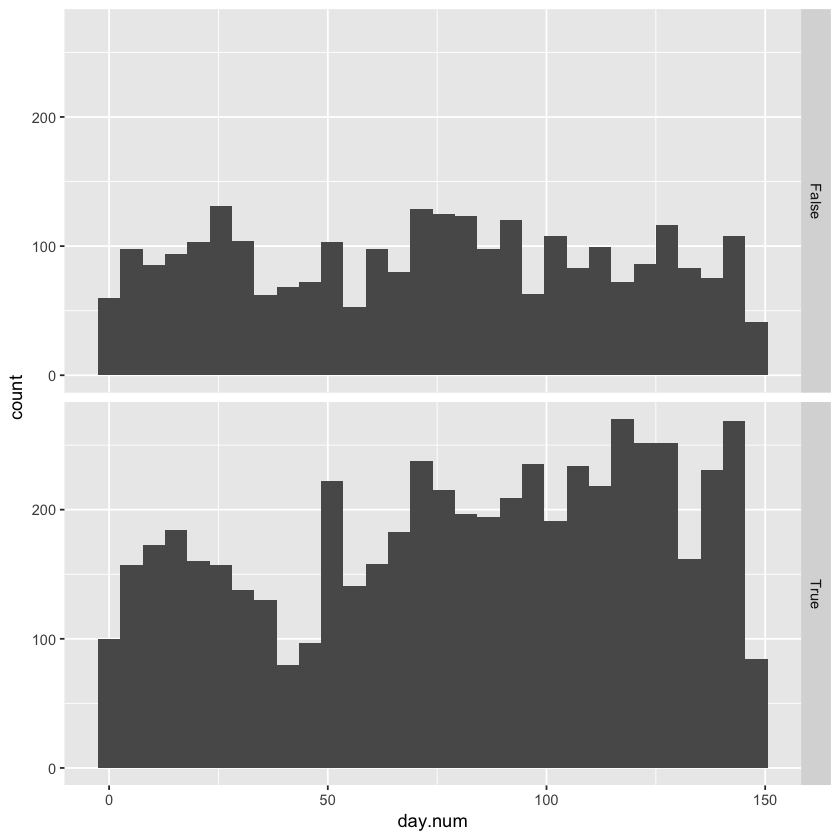

In [89]:
ggplot(exp.posts.science.2020.df, aes(day.num)) +
    geom_histogram() +
    facet_grid(visible ~ . )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



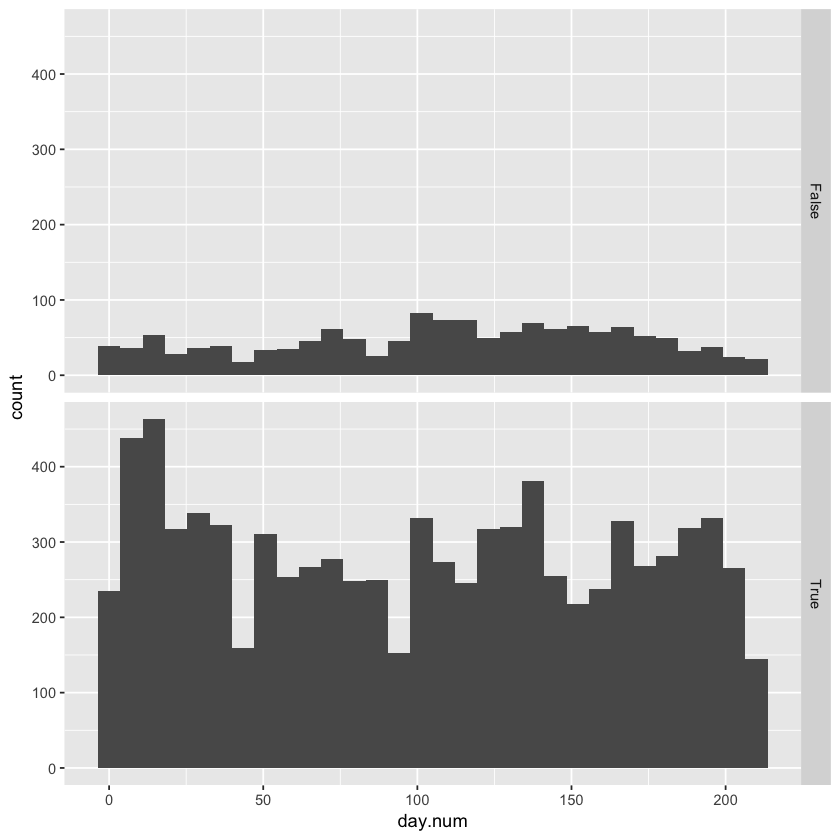

In [90]:
ggplot(exp.posts.futurology.df, aes(day.num)) +
    geom_histogram() +
    facet_grid(visible ~ . )



In [91]:
## set up posts dataframe
exp.posts.science.2020.df$before.pandemic <- exp.posts.science.2020.df$created.date < as.Date("2020-03-11")
exp.posts.futurology.df$before.pandemic <- exp.posts.futurology.df$created.date < as.Date("2020-03-11")

exp.posts.science.2020.df$before.lockdown <- exp.posts.science.2020.df$created.date >= as.Date("2020-03-15")
exp.posts.futurology.df$before.lockdown <- exp.posts.futurology.df$created.date >= as.Date("2020-03-15")

exp.posts.science.2020.pandemic.df <- subset(exp.posts.science.2020.df, created.date < as.Date("2020-03-11") | created.date >= as.Date("2020-03-15"))
exp.posts.futurology.pandemic.df <- subset(exp.posts.futurology.df, created.date < as.Date("2020-03-11") | created.date >= as.Date("2020-03-15"))

print("r/science")
nrow(exp.posts.science.2020.df)
nrow(exp.posts.science.2020.pandemic.df)

print("r/futurology")
nrow(exp.posts.futurology.df)
nrow(exp.posts.futurology.pandemic.df)

[1] "r/science"


[1] 8271

[1] 8036

[1] "r/futurology"


[1] 9963

[1] 9801

In [92]:
exp.newcomer.comments.science.2020.df$before.pandemic <- as.Date(exp.newcomer.comments.science.2020.df$post.created) < as.Date("2020-03-11")
exp.newcomer.comments.science.2020.df$before.lockdown <- as.Date(exp.newcomer.comments.science.2020.df$post.created) >= as.Date("2020-03-15")
exp.newcomer.comments.science.2020.pandemic.df <- subset(exp.newcomer.comments.science.2020.df, as.Date(post.created) < as.Date("2020-03-11") | as.Date(post.created) >= as.Date("2020-03-15"))

In [93]:
exp.newcomer.comments.futurology.df$before.pandemic <- as.Date(exp.newcomer.comments.futurology.df$post.created) < as.Date("2020-03-11")
exp.newcomer.comments.futurology.df$before.lockdown <- as.Date(exp.newcomer.comments.futurology.df$post.created) >= as.Date("2020-03-15")
exp.newcomer.comments.futurology.df <- subset(exp.newcomer.comments.futurology.df, as.Date(post.created) < as.Date("2020-03-11") | as.Date(post.created) >= as.Date("2020-03-15"))

##### Establish the context of the analyses: declining newcomer comment counts but not overall comment counts after the lockdown (r/science)

In [94]:
summary(glm.nb(newcomer.comments ~ 
               before.lockdown, 
               data= subset(exp.posts.science.2020.df, (block.id.int %in% outlier.block.ids)!=TRUE)))


summary(glm.nb(newcomer.comments ~ 
               day.num, 
               data= subset(exp.posts.science.2020.df, (block.id.int %in% outlier.block.ids)!=TRUE)))

summary(glm.nb(num.comments ~ 
               before.lockdown, 
               data= subset(exp.posts.science.2020.df, (block.id.int %in% outlier.block.ids)!=TRUE)))

summary(glm.nb(num.comments ~ 
               day.num, 
               data= subset(exp.posts.science.2020.df, (block.id.int %in% outlier.block.ids)!=TRUE)))


Call:
glm.nb(formula = newcomer.comments ~ before.lockdown, data = subset(exp.posts.science.2020.df, 
    (block.id.int %in% outlier.block.ids) != TRUE), init.theta = 0.09643923364, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0201  -0.9188  -0.9188  -0.4653   5.0352  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          3.05131    0.09871  30.911   <2e-16 ***
before.lockdownTRUE -1.02571    0.10584  -9.691   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.0964) family taken to be 1)

    Null deviance: 6038.6  on 8270  degrees of freedom
Residual deviance: 5919.3  on 8269  degrees of freedom
AIC: 31069

Number of Fisher Scoring iterations: 1


              Theta:  0.09644 
          Std. Err.:  0.00199 

 2 x log-likelihood:  -31063.00400 


Call:
glm.nb(formula = newcomer.comments ~ day.num, data = subset(exp.posts.science.2020.df, 
    (block.id.int %in% outlier.block.ids) != TRUE), init.theta = 0.0980377406, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0195  -0.9338  -0.8785  -0.4321   5.3760  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.9735486  0.0736138   40.39   <2e-16 ***
day.num     -0.0110362  0.0008268  -13.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.098) family taken to be 1)

    Null deviance: 6121.9  on 8270  degrees of freedom
Residual deviance: 5922.1  on 8269  degrees of freedom
AIC: 30991

Number of Fisher Scoring iterations: 1


              Theta:  0.09804 
          Std. Err.:  0.00203 

 2 x log-likelihood:  -30985.11100 


Call:
glm.nb(formula = num.comments ~ before.lockdown, data = subset(exp.posts.science.2020.df, 
    (block.id.int %in% outlier.block.ids) != TRUE), init.theta = 0.2065999897, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5649  -1.1508  -0.9528  -0.6078   7.7821  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          4.34718    0.06738  64.518   <2e-16 ***
before.lockdownTRUE -0.06179    0.07221  -0.856    0.392    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.2066) family taken to be 1)

    Null deviance: 10315  on 8270  degrees of freedom
Residual deviance: 10314  on 8269  degrees of freedom
AIC: 66401

Number of Fisher Scoring iterations: 1


              Theta:  0.20660 
          Std. Err.:  0.00279 

 2 x log-likelihood:  -66395.27800 


Call:
glm.nb(formula = num.comments ~ day.num, data = subset(exp.posts.science.2020.df, 
    (block.id.int %in% outlier.block.ids) != TRUE), init.theta = 0.2065883011, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5598  -1.1521  -0.9535  -0.6088   7.9403  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.3086984  0.0505701  85.203   <2e-16 ***
day.num     -0.0001933  0.0005667  -0.341    0.733    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.2066) family taken to be 1)

    Null deviance: 10315  on 8270  degrees of freedom
Residual deviance: 10315  on 8269  degrees of freedom
AIC: 66402

Number of Fisher Scoring iterations: 1


              Theta:  0.20659 
          Std. Err.:  0.00279 

 2 x log-likelihood:  -66395.90100 

[1] 16

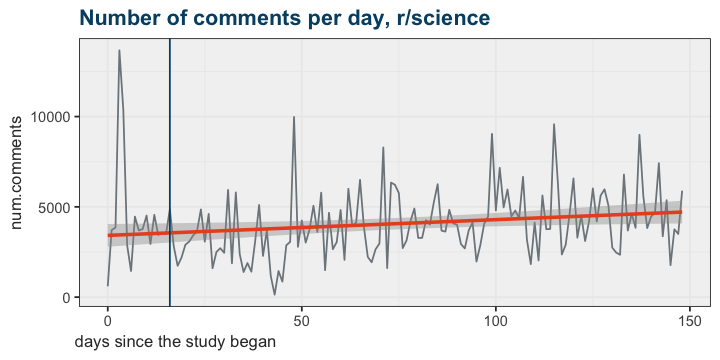

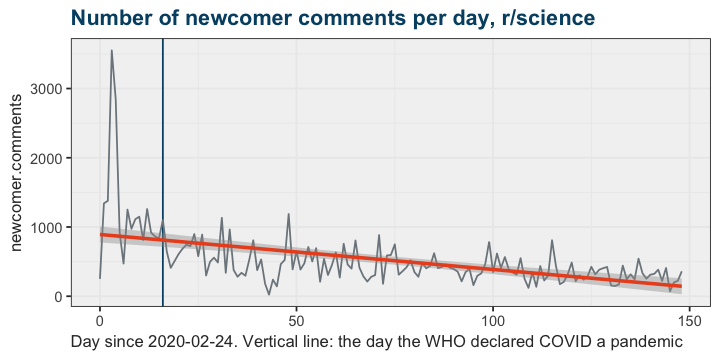

In [231]:
options(repr.plot.width = 6, repr.plot.height = 3)

exp.posts.science.2020.agg.df <- aggregate(subset(exp.posts.science.2020.df, (block.id.int %in% outlier.block.ids)!=TRUE)[c("num.comments", "newcomer.comments")], 
                                           by=list(exp.posts.science.2020.df$day.num), 
                                           FUN=sum)

lockdown.day.num.science.2020 <- as.numeric(as.Date("2020-03-11") - min(exp.posts.science.2020.df$created.date))

ggplot(exp.posts.science.2020.agg.df, aes(Group.1, num.comments)) +
    geom_line(color=catpalette[4]) +
    geom_smooth(method=lm, color=catpalette[2]) +
    geom_vline(xintercept = lockdown.day.num.science.2020,
               color=catpalette[3]) +
    cat.theme +
    xlab("days since the study began") +
    ggtitle("Number of comments per day, r/science")

ggplot(exp.posts.science.2020.agg.df, aes(Group.1, newcomer.comments)) +
    geom_vline(xintercept = lockdown.day.num.science.2020,
               color=catpalette[3]) +
    geom_line(color=catpalette[4]) +
    geom_smooth(method=lm, color=catpalette[2]) +
    xlab(paste("Day since ",
               min(exp.posts.science.2020.df$created.date),
               ". Vertical line: the day the WHO declared COVID a pandemic", sep="")) +
    cat.theme +
    ggtitle("Number of newcomer comments per day, r/science")

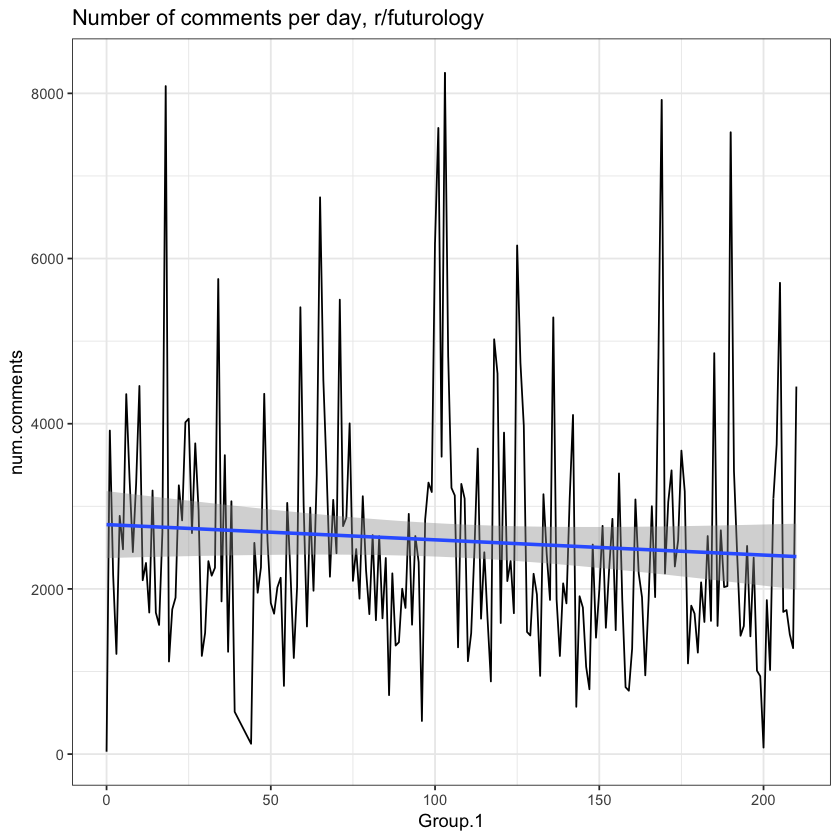

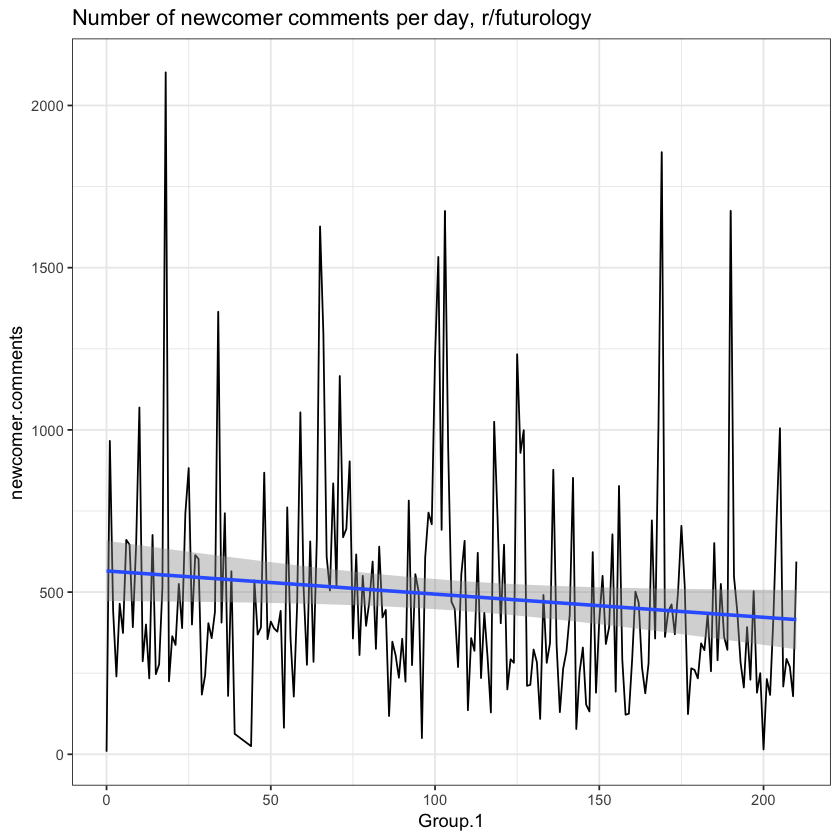

In [96]:
exp.posts.futurology.agg.df <- aggregate(exp.posts.futurology.df[c("num.comments", "newcomer.comments")], 
                                           by=list(exp.posts.futurology.df$day.num), 
                                           FUN=sum)

ggplot(exp.posts.futurology.agg.df, aes(Group.1, num.comments)) +
    geom_line() +
    geom_smooth(method=lm) +
    theme_bw()  +
    ggtitle("Number of comments per day, r/futurology")

ggplot(exp.posts.futurology.agg.df, aes(Group.1, newcomer.comments)) +
    geom_line() +
    geom_smooth(method=lm) +
    theme_bw()  +
    ggtitle("Number of newcomer comments per day, r/futurology")

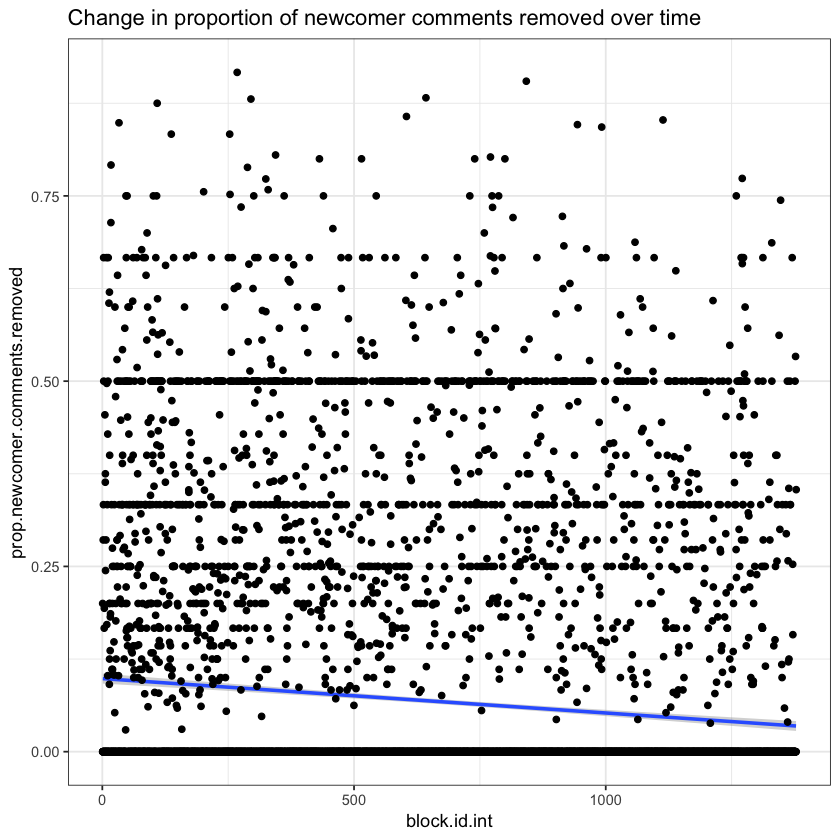

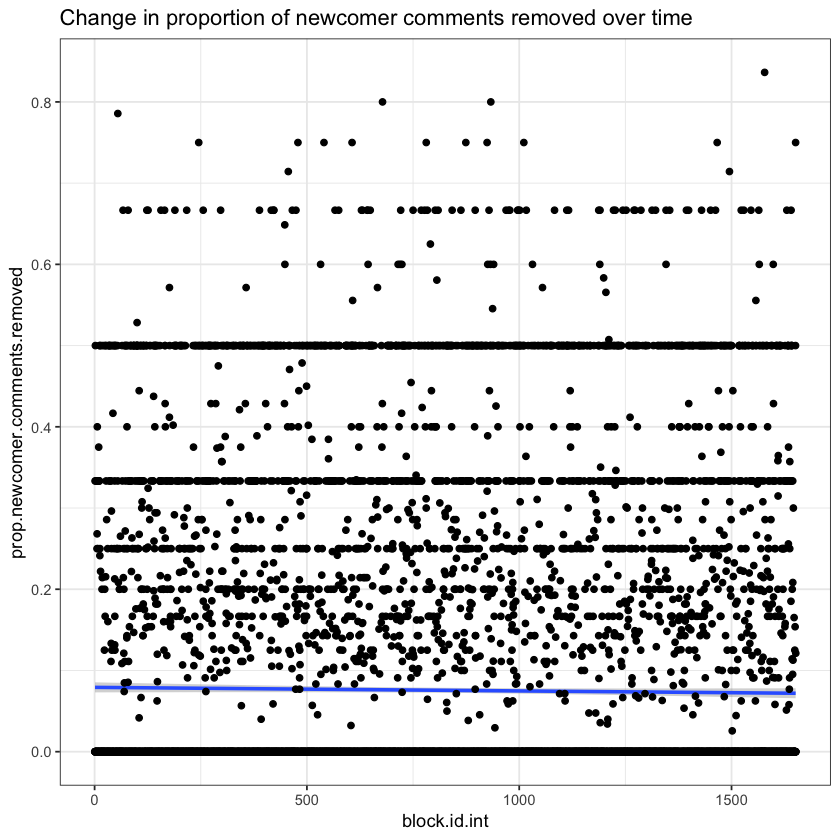

In [104]:
exp.posts.science.2020.df$prop.newcomer.comments.removed <- exp.posts.science.2020.df$newcomer.comments.removed / (exp.posts.science.2020.df$newcomer.comments+1)

exp.posts.futurology.df$prop.newcomer.comments.removed <- exp.posts.futurology.df$newcomer.comments.removed / (exp.posts.futurology.df$newcomer.comments+1)
# ggplot(exp.posts.futurology.df, 
#        aes(block.id.int, newcomer.comments.removed)) +
#     geom_jitter() +
#     theme_bw()


ggplot(exp.posts.science.2020.df, 
       aes(block.id.int, prop.newcomer.comments.removed)) +
    geom_smooth(method=lm) +
    geom_jitter() +
    theme_bw()  +
    ggtitle("Change in proportion of newcomer comments removed over time")

ggplot(exp.posts.futurology.df, 
       aes(block.id.int, prop.newcomer.comments.removed)) +
    geom_smooth(method=lm) +
    geom_jitter() +
    theme_bw() +
    ggtitle("Change in proportion of newcomer comments removed over time")



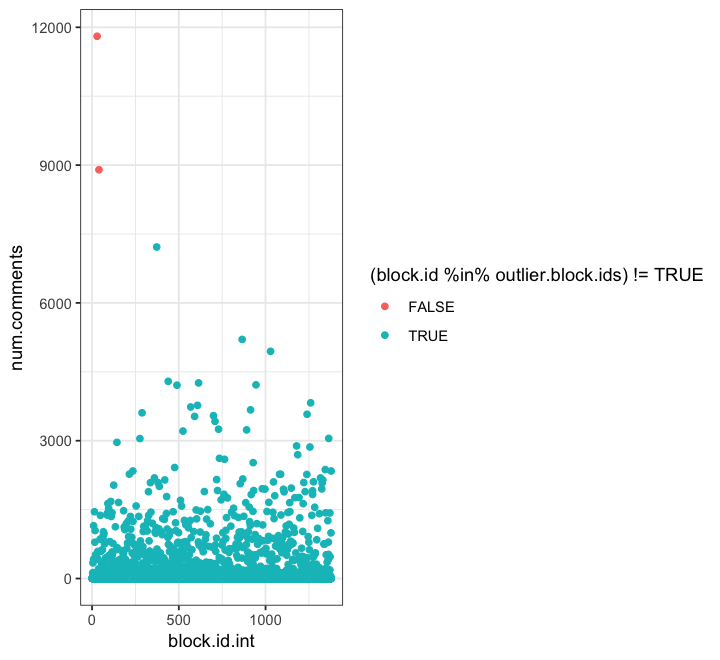

In [249]:
ggplot(subset(exp.posts.science.2020.df), 
       aes(block.id.int, num.comments,
       color = (block.id %in% outlier.block.ids)!=TRUE)) +
    geom_jitter() +
    theme_bw()

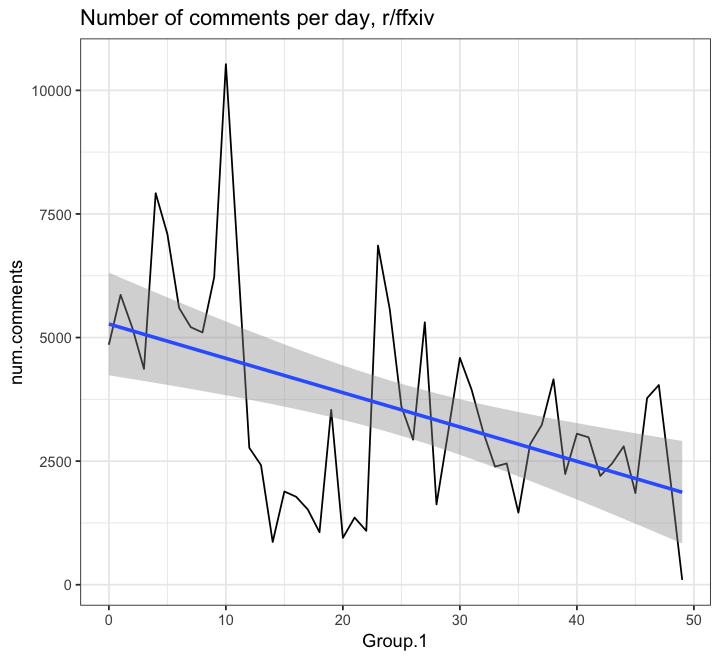

In [256]:
## aggregate ffxiv trends in control group
exp.posts.ffxiv.agg.df <- aggregate(subset(exp.posts.ffxiv.df, treatment==0)[c('newcomer.comments', 
                                                                                      'num.comments', 
                                                                                      'newcomer.comments.removed', 
                                                                                      'num.comments.removed')], 
                                           by=list(subset(exp.posts.ffxiv.df, treatment==0)$day.num), 
                                           FUN=sum)


ggplot(exp.posts.ffxiv.agg.df, aes(Group.1, num.comments)) +
    geom_line() +
    geom_smooth(method=lm) +
    theme_bw()  +
    ggtitle("Number of comments per day, r/ffxiv")

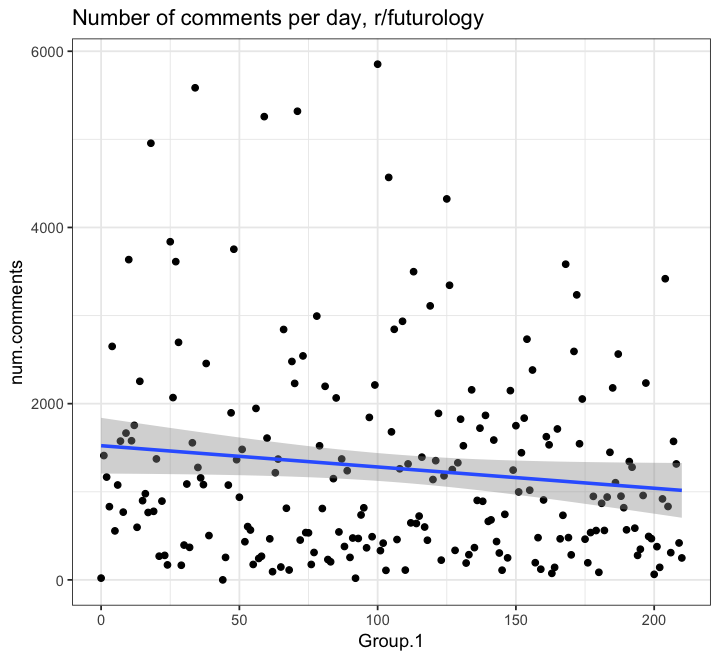

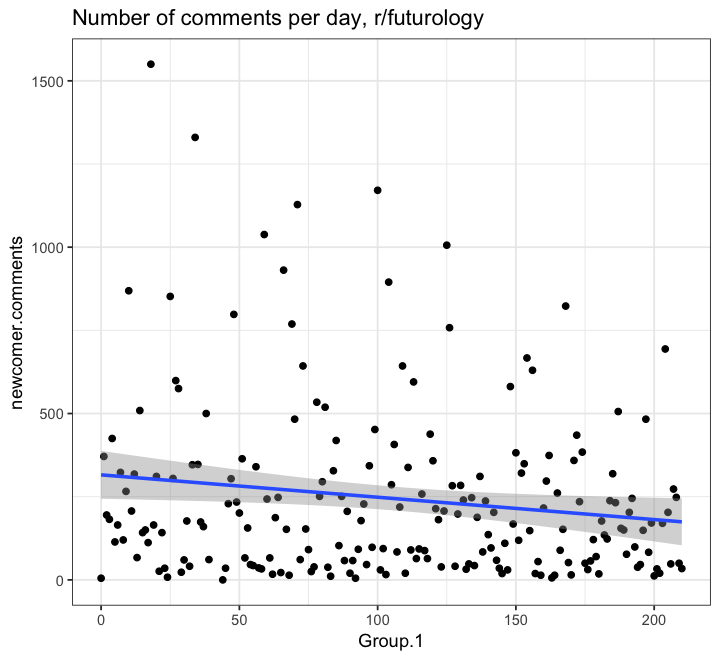

In [261]:
## aggregate ffxiv trends in control group
exp.posts.futurology.agg.df <- aggregate(subset(exp.posts.futurology.df, treatment==0)[c('newcomer.comments', 
                                                                                      'num.comments', 
                                                                                      'newcomer.comments.removed', 
                                                                                      'num.comments.removed')], 
                                           by=list(subset(exp.posts.futurology.df, treatment==0)$day.num), 
                                           FUN=sum)


ggplot(exp.posts.futurology.agg.df, aes(Group.1, num.comments)) +
    geom_point() +
    geom_smooth(method=lm) +
    theme_bw()  +
    ggtitle("Number of comments per day, r/futurology")

ggplot(exp.posts.futurology.agg.df, aes(Group.1, newcomer.comments)) +
    geom_point() +
    geom_smooth(method=lm) +
    theme_bw()  +
    ggtitle("Number of comments per day, r/futurology")

### Randomization Inference for newcomer comments removed and newcomer comments

In [262]:
ri.df     <- subset(exp.posts.science.2020.df, (block.id %in% outlier.block.ids)!=TRUE)
ri.df$Z   <- ri.df$treatment
ri.df$Y   <- ri.df$newcomer.comments.removed
ri.df.dat <- ri.df[c("block.id.int", 'Y', 'Z')]

h2.declaration <-
  with(ri.df.dat,{
    declare_ra(
      blocks = ri.df.dat$block.id.int,
      N = nrow(ri.df.dat),
      block_m = with(ri.df.dat, tapply(Z, block.id.int, sum))
    )
  })


h2.ri2_out <- conduct_ri(
  Y ~ Z,
  sharp_hypothesis = 0,
  declaration = h2.declaration,
  data = ri.df.dat,
  sims=5000,
  progress_bar=TRUE,
  p = "upper"
)
h2.ri2_out


In [26]:
ri.df     <- subset(exp.posts.science.2020.df, (block.id %in% outlier.block.ids)!=TRUE)
ri.df$Z   <- ri.df$treatment
ri.df$Y   <- ri.df$newcomer.comments
ri.df.dat <- ri.df[c("block.id.int", 'Y', 'Z')]

h3.declaration <-
  with(ri.df.dat,{
    declare_ra(
      blocks = ri.df.dat$block.id.int,
      N = nrow(ri.df.dat),
      block_m = with(ri.df.dat, tapply(Z, block.id.int, sum))
    )
  })


h3.ri2_out <- conduct_ri(
  Y ~ Z,
  sharp_hypothesis = 0,
  declaration = h3.declaration,
  data = ri.df.dat,
  sims=5000,
  progress_bar=TRUE,
  p = "upper"
)
h3.ri2_out


  term   estimate upper_p_value
1    Z -0.8439855         0.826

In [35]:
exp.newcomer.comments.science.2020.df$post.block.id.int <- as.numeric(exp.newcomer.comments.science.2020.df$post.block.id)

In [264]:
ri.df     <- subset(exp.newcomer.comments.science.2020.df, (post.block.id %in% outlier.block.ids)!=TRUE)
ri.df$Z   <- ri.df$post.treatment
ri.df$Y   <- ri.df$visible.int
ri.df.dat <- ri.df[c("post.block.id.int", 'Y', 'Z')]

h1.declaration <-
  with(ri.df.dat,{
    declare_ra(
      blocks = ri.df.dat$post.block.id.int,
      N = nrow(ri.df.dat),
      block_m = with(ri.df.dat, tapply(Z, post.block.id.int, sum))
    )
  })


h1.ri2_out <- conduct_ri(
  Y ~ Z,
  sharp_hypothesis = 0,
  declaration = h1.declaration,
  data = ri.df.dat,
  sims=5000,
  progress_bar=TRUE,
  p = "upper"
)
h1.ri2_out


# Final Combined Analysis

In [36]:
#colnames(exp.posts.science.2017.df)

In [37]:
#length(unique(exp.newcomer.comments.science.2020.df$post.assign.number))
#exp.newcomer.comments.ffxiv.df$link

In [125]:
science.2017.ma.df <- exp.posts.science.2017.df[c("num.comments", "newcomer.comments", "num.comments.removed", "newcomer.comments.removed", 'block.id', "visible", "weekend","treatment")]
science.2017.ma.df$study <- "science.2017"
science.2020.ma.df <- subset(exp.posts.science.2020.df, (block.id %in% outlier.block.ids)!=TRUE)[c("num.comments", "newcomer.comments", "num.comments.removed", "newcomer.comments.removed", 'block.id', "visible", "weekend","treatment")]
science.2020.ma.df$study <- "science.2020"
ffxiv.ma.df <- exp.posts.ffxiv.df[c("num.comments", "newcomer.comments", "num.comments.removed", "newcomer.comments.removed", 'block.id', "visible", "weekend","treatment")]
ffxiv.ma.df$study <- "ffxiv.2019"
futurology.ma.df <- exp.posts.futurology.df[c("num.comments", "newcomer.comments", "num.comments.removed", "newcomer.comments.removed", 'block.id', "visible", "weekend","treatment")]
futurology.ma.df$study <- "futurology.2020"


## futurology, including for now only randomization blocks before the gap
meta.analysis.df <-  rbind(science.2017.ma.df, 
                           ffxiv.ma.df, 
                           science.2020.ma.df,
                           futurology.ma.df)



comments.science.2017.ma.df <- exp.newcomer.comments.science.2017.df[c("visible", "post.treatment", "post.visible", 'post.block.id', 'link_id')]
comments.science.2017.ma.df$study <- "science.2017"
comments.science.2020.ma.df <- subset(exp.newcomer.comments.science.2020.df, (post.block.id %in% outlier.block.ids)!=TRUE)[c("visible", "post.treatment", "post.visible", 'post.block.id', 'link_id')]
comments.science.2020.ma.df$study <- "science.2020"
comments.ffxiv.2019.ma.df   <- exp.newcomer.comments.ffxiv.df[c("visible", "post.treatment", "post.visible", 'post.block.id', 'link_id')]
comments.ffxiv.2019.ma.df$study <- "ffxiv.2019"

## futurology, including for now only randomization blocks before the gap
comments.futurology.2020.ma.df <- exp.newcomer.comments.futurology.df[c("visible", "post.treatment", "post.visible", 'post.block.id', 'link_id')]
comments.futurology.2020.ma.df$study <- "futurology.2020"


comments.meta.analysis.df <-  rbind(comments.science.2017.ma.df, 
                                    comments.science.2020.ma.df, 
                                    comments.ffxiv.2019.ma.df,
                                    comments.futurology.2020.ma.df)

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(616L, 1201L, 1006L, 17L, :
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, ri, value = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, :
“invalid factor level, NA generated”


In [126]:
generate.result.table <- function(model.obj, model.name, treat.var, n.size, p.var="Pr(>|z|)"){

    m.summary <- summary(model.obj)
    m.df = data.frame(
        model.name            = model.name,
        treat.estimate        = m.summary$coefficients[treat.var,][['Estimate']],
        treat.estimate.stderr = m.summary$coefficients[treat.var,][['Std. Error']],
        treat.estimate.pvalue = m.summary$coefficients[treat.var,][[p.var]],
        n.size                = n.size
    )
    m.df$treat.estimate.upr <- m.df$treat.estimate + critval * m.df$treat.estimate.stderr
    m.df$treat.estimate.lwr <- m.df$treat.estimate - critval * m.df$treat.estimate.stderr

    m.df$treat.estimate.irr.upr <- exp(m.df$treat.estimate + critval * m.df$treat.estimate.stderr)
    m.df$treat.estimate.irr.lwr <- exp(m.df$treat.estimate - critval * m.df$treat.estimate.stderr)
    m.df$treat.estimate.irr <- exp(m.df$treat.estimate)
    return (m.df)
    
}

# ## test function
# rbind(generate.result.table(h3.science.2017.m, "science.2017", "treatment", nrow(exp.posts.science.2017.df)),
#       generate.result.table(h3.science.2017.m, "science.2017", "treatment", nrow(exp.posts.science.2017.df)))

### Chance of Comment Removal

In [127]:
comments.science.2017.ma.df$visible.int    <- comments.science.2017.ma.df$visible=="True"
comments.science.2020.ma.df$visible.int    <- comments.science.2020.ma.df$visible=="True"
comments.ffxiv.2019.ma.df$visible.int      <- comments.ffxiv.2019.ma.df$visible=="True"
comments.meta.analysis.df$visible.int      <- comments.meta.analysis.df$visible=="True"
comments.futurology.2020.ma.df$visible.int <- comments.futurology.2020.ma.df$visible=="True"

In [285]:
## Random Effects Meta-Analysis

m1.all.re <- lmer(visible.int ~ post.treatment + post.visible + (1|link_id/study), 
              data=comments.meta.analysis.df) #, method="binomial")


summary(m1.all.re)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: visible.int ~ post.treatment + post.visible + (1 | link_id/study)
   Data: comments.meta.analysis.df

REML criterion at convergence: 288353.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3780 -0.9027  0.3815  0.6029  2.3123 

Random effects:
 Groups        Name        Variance Std.Dev.
 study:link_id (Intercept) 0.01344  0.1159  
 link_id       (Intercept) 0.01097  0.1048  
 Residual                  0.17336  0.4164  
Number of obs: 258907, groups:  study:link_id, 13904; link_id, 13904

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)      7.217e-01  6.214e-03 1.080e+04  116.13  < 2e-16 ***
post.treatment   1.623e-02  4.874e-03 1.105e+04    3.33 0.000871 ***
post.visibleTrue 8.089e-02  6.316e-03 1.086e+04   12.81  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
     

In [129]:
h1.dim.science.2016 <- difference_in_means(visible.int ~ post.treatment, 
                        data=comments.science.2017.ma.df, 
                        clusters=comments.science.2017.ma.df$link_id)

h1.dim.ffxiv.2019   <- difference_in_means(visible.int ~ post.treatment, 
                        data=comments.ffxiv.2019.ma.df, 
                        clusters=comments.ffxiv.2019.ma.df$link_id)

h1.dim.science.2020 <- difference_in_means(visible.int ~ post.treatment, 
                        data=comments.science.2020.ma.df, 
                        clusters=comments.science.2020.ma.df$link_id)

h1.dim.futurology.2020 <- difference_in_means(visible.int ~ post.treatment, 
                        data=comments.futurology.2020.ma.df,
                        clusters=comments.futurology.2020.ma.df$link_id)

Warning message:
“Assigning non-quosure objects to quosure lists is deprecated as of rlang 0.3.0.
Please coerce to a bare list beforehand with `as.list()`
This warning is displayed once per session.”


#### Generate Table for illustration

In [162]:
## Combined meta-analysis plot that includes individual studies

h1.plot.dim.df <- data.frame(rbind(
    summary(h1.dim.science.2016)$coefficients,
    summary(h1.dim.ffxiv.2019)$coefficients,
    summary(h1.dim.science.2020)$coefficients,
    summary(h1.dim.futurology.2020)$coefficients
))

h1.plot.dim.df$model.name <- c("science.2016","ffxiv.2019", "science.2020", "futurology.2020")
h1.plot.dim.df$treat.estimate <- h1.plot.dim.df[['Estimate']]
h1.plot.dim.df$treat.estimate.pvalue <- h1.plot.dim.df[['Pr...t..']]
h1.plot.dim.df$treat.estimate.upr <- h1.plot.dim.df$CI.Upper
h1.plot.dim.df$treat.estimate.lwr <- h1.plot.dim.df$CI.Lower

h1.plot.re.ma.df <- generate.result.table(m1.all.re, "all", "post.treatment", nrow(comments.meta.analysis.df),"Pr(>|t|)") 
    

In [163]:
h1.plot.dim.df

,Estimate,Std..Error,t.value,Pr...t..,CI.Lower,CI.Upper,DF,model.name,treat.estimate,treat.estimate.pvalue,treat.estimate.upr,treat.estimate.lwr
post.treatment,0.074841660,0.052115088,1.4360843,0.15737094,-0.029903755,0.179587076,48.70174,science.2016,0.074841660,0.15737094,0.179587076,-0.029903755
post.treatment.1,-0.001145166,0.002862479,-0.4000611,0.68923914,-0.006765681,0.004475348,669.63565,ffxiv.2019,-0.001145166,0.68923914,0.004475348,-0.006765681
post.treatment.2,0.043742943,0.018972040,2.3056531,0.02173314,0.006425205,0.081060682,339.01739,science.2020,0.043742943,0.02173314,0.081060682,0.006425205
post.treatment.3,0.008073013,0.008912780,0.9057794,0.36589178,-0.009477464,0.025623489,259.83009,futurology.2020,0.008073013,0.36589178,0.025623489,-0.009477464


### Newcomer Comments

In [164]:
h3.science.2017.m <- glm.nb(newcomer.comments ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="science.2017") )

h3.science.2020.m <- glm.nb(newcomer.comments ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="science.2020") )
h3.ffxiv.2019.m   <- glm.nb(newcomer.comments ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="ffxiv.2019") )

h3.futurology.2020.m   <- glm.nb(newcomer.comments ~ 
                                treatment + 
                                visible,
                                data=futurology.ma.df )

print(screenreg(list(h3.science.2017.m, h3.ffxiv.2019.m, h3.science.2020.m, h3.futurology.2020.m)))

h3.plot.df <- rbind(
    generate.result.table(h3.science.2017.m, "science.2016", "treatment", nrow(exp.posts.science.2017.df)),
    generate.result.table(h3.ffxiv.2019.m,   "ffxiv.2019",   "treatment", nrow(exp.posts.ffxiv.df)),
    generate.result.table(h3.science.2020.m, "science.2020", "treatment", nrow(exp.posts.science.2020.df)),
    generate.result.table(h3.futurology.2020.m, "futurology.2020", "treatment", nrow(exp.posts.futurology.df))    
)


                Model 1       Model 2        Model 3        Model 4      
-------------------------------------------------------------------------
(Intercept)         1.28 ***      -0.82 ***       1.74 ***       1.52 ***
                   (0.13)         (0.07)         (0.07)         (0.08)   
treatment           0.51 ***      -0.03          -0.11           0.01    
                   (0.14)         (0.04)         (0.07)         (0.06)   
visibleTrue         0.85 ***       0.91 ***       0.65 ***       0.88 ***
                   (0.14)         (0.07)         (0.08)         (0.09)   
-------------------------------------------------------------------------
AIC              7554.73       30786.91       30890.87       40709.06    
BIC              7577.54       30816.52       30918.94       40737.88    
Log Likelihood  -3773.36      -15389.46      -15441.43      -20350.53    
Deviance         1533.26        9224.89        5901.69        8098.94    
Num. obs.        2214          12100 

### Newcomer Comments Removed

In [165]:
h2.science.2017.m <- glm.nb(newcomer.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="science.2017") )

h2.science.2020.m <- glm.nb(newcomer.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="science.2020") )

h2.ffxiv.2019.m   <- glm.nb(newcomer.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="ffxiv.2019") )

h2.futurology.2020.m   <- glm.nb(newcomer.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="futurology.2020"))


print(screenreg(list(h2.science.2017.m, h2.ffxiv.2019.m, h2.science.2020.m, h2.futurology.2020.m)))



h2.plot.df <- rbind(
    generate.result.table(h2.science.2017.m, "science.2016", "treatment", nrow(exp.posts.science.2017.df)),
    generate.result.table(h2.ffxiv.2019.m,   "ffxiv.2019",   "treatment", nrow(exp.posts.ffxiv.df)),
    generate.result.table(h2.science.2020.m, "science.2020", "treatment", nrow(exp.posts.science.2020.df)),
    generate.result.table(h2.futurology.2020.m, "futurology.2020", "treatment", nrow(exp.posts.futurology.df))

)


                Model 1       Model 2       Model 3       Model 4      
-----------------------------------------------------------------------
(Intercept)         0.78 ***     -4.38 ***      0.66 ***      -0.17    
                   (0.17)        (0.37)        (0.10)         (0.11)   
treatment           0.36 *        0.04         -0.24 *        -0.01    
                   (0.18)        (0.21)        (0.10)         (0.07)   
visibleTrue         0.75 ***      0.04          0.80 ***       0.96 ***
                   (0.19)        (0.37)        (0.11)         (0.11)   
-----------------------------------------------------------------------
AIC              5071.01       1520.77      17646.80       22016.60    
BIC              5093.82       1550.38      17674.88       22045.43    
Log Likelihood  -2531.51       -756.39      -8819.40      -11004.30    
Deviance         1006.09        486.01       3380.94        4907.56    
Num. obs.        2214         12100          8259           996

## Adjust P Values

In [166]:
science.2017.pvalues <- data.frame(hypothesis = c("h1", "h2", "h3"),
                         pvalue    = c(
                             h1.plot.dim.df[h1.plot.dim.df$model.name=="science.2016",][['treat.estimate.pvalue']],
                             h2.plot.df[h2.plot.df$model.name=="science.2016",][['treat.estimate.pvalue']],
                             h3.plot.df[h3.plot.df$model.name=="science.2016",][['treat.estimate.pvalue']]
                         ))
science.2017.pvalues$adjusted <- p.adjust(science.2017.pvalues$pvalue, method="holm")
science.2017.pvalues

science.2020.pvalues <- data.frame(hypothesis = c("h1", "h2", "h3"),
                         pvalue    = c(
                             h1.plot.dim.df[h1.plot.dim.df$model.name=="science.2020",][['treat.estimate.pvalue']],
                             h2.plot.df[h2.plot.df$model.name=="science.2020",][['treat.estimate.pvalue']],
                             h3.plot.df[h3.plot.df$model.name=="science.2020",][['treat.estimate.pvalue']]
                         ))
science.2020.pvalues$adjusted <- p.adjust(science.2020.pvalues$pvalue, method="holm")
science.2020.pvalues

ffxiv.2019.pvalues <- data.frame(hypothesis = c("h1", "h2", "h3"),
                         pvalue    = c(
                             h1.plot.dim.df[h1.plot.dim.df$model.name=="ffxiv.2019",][['treat.estimate.pvalue']],
                             h2.plot.df[h2.plot.df$model.name=="ffxiv.2019",][['treat.estimate.pvalue']],
                             h3.plot.df[h3.plot.df$model.name=="ffxiv.2019",][['treat.estimate.pvalue']]
                         ))
ffxiv.2019.pvalues$adjusted <- p.adjust(ffxiv.2019.pvalues$pvalue, method="holm")
ffxiv.2019.pvalues

futurology.2020.pvalues <- data.frame(hypothesis = c("h1", "h2", "h3"),
                         pvalue    = c(
                             h1.plot.dim.df[h1.plot.dim.df$model.name=="futurology.2020",][['treat.estimate.pvalue']],
                             h2.plot.df[h2.plot.df$model.name=="futurology.2020",][['treat.estimate.pvalue']],
                             h3.plot.df[h3.plot.df$model.name=="futurology.2020",][['treat.estimate.pvalue']]
                         ))
futurology.2020.pvalues$adjusted <- p.adjust(futurology.2020.pvalues$pvalue, method="holm")

futurology.2020.pvalues

hypothesis,pvalue,adjusted
h1,0.1573709440,0.157370944
h2,0.0480774262,0.096154852
h3,0.0003593747,0.001078124


hypothesis,pvalue,adjusted
h1,0.02173314,0.04548299
h2,0.01516100,0.04548299
h3,0.12891504,0.12891504


hypothesis,pvalue,adjusted
h1,0.6892391,1
h2,0.8573916,1
h3,0.4423987,1


hypothesis,pvalue,adjusted
h1,0.3658918,1
h2,0.8460283,1
h3,0.8839543,1


# Final Plots
## H1: Newcomer Compliance

In [167]:
h1.plot.dim.df

,Estimate,Std..Error,t.value,Pr...t..,CI.Lower,CI.Upper,DF,model.name,treat.estimate,treat.estimate.pvalue,treat.estimate.upr,treat.estimate.lwr
post.treatment,0.074841660,0.052115088,1.4360843,0.15737094,-0.029903755,0.179587076,48.70174,science.2016,0.074841660,0.15737094,0.179587076,-0.029903755
post.treatment.1,-0.001145166,0.002862479,-0.4000611,0.68923914,-0.006765681,0.004475348,669.63565,ffxiv.2019,-0.001145166,0.68923914,0.004475348,-0.006765681
post.treatment.2,0.043742943,0.018972040,2.3056531,0.02173314,0.006425205,0.081060682,339.01739,science.2020,0.043742943,0.02173314,0.081060682,0.006425205
post.treatment.3,0.008073013,0.008912780,0.9057794,0.36589178,-0.009477464,0.025623489,259.83009,futurology.2020,0.008073013,0.36589178,0.025623489,-0.009477464


In [168]:
h1.plot.dim.df$model.name <- factor(h1.plot.dim.df$model.name, levels=c("science.2016", "ffxiv.2019", "science.2020", "futurology.2020"))

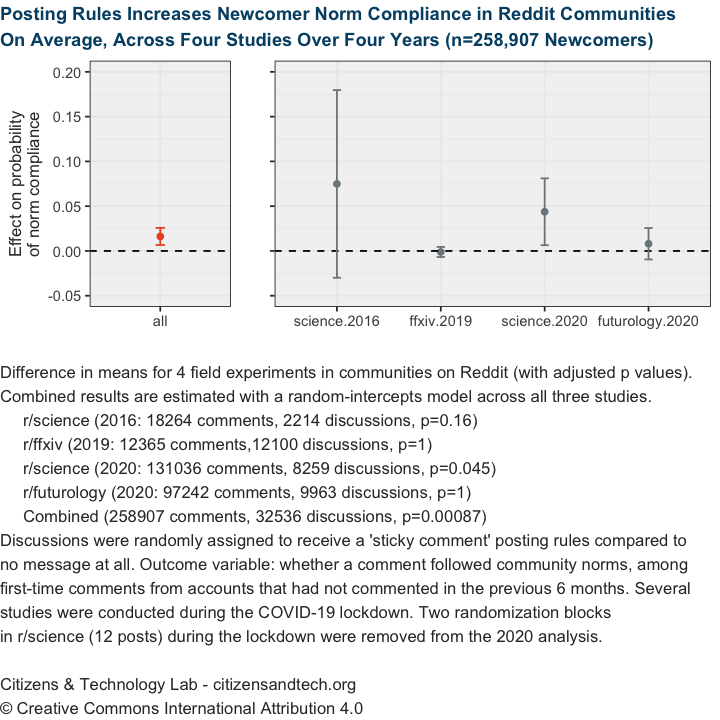

In [237]:
options(repr.plot.width = 6, repr.plot.height = 6)


h1.plot.individ <- ggplot(h1.plot.dim.df, aes(model.name, treat.estimate)) +
    geom_point(color=chartpalette[3]) +
    geom_hline(yintercept=0, linetype="dashed") +
    geom_errorbar(ymin=h1.plot.dim.df$treat.estimate.lwr, 
                  ymax=h1.plot.dim.df$treat.estimate.upr,
                  width=0.08,color=chartpalette[3]) +
    ylim(-0.05,0.2) +
    xlab("") +
    ylab("") +
    cat.theme +
    theme(axis.text.y=element_blank())

#h1.plot.individ

h1.plot.ma <- ggplot(h1.plot.re.ma.df, aes(model.name, treat.estimate)) +
    geom_point(color=chartpalette[1]) +
    geom_hline(yintercept=0, linetype="dashed") +
    geom_errorbar(ymin=h1.plot.re.ma.df$treat.estimate.lwr, 
                  ymax=h1.plot.re.ma.df$treat.estimate.upr,
                  width=0.08,color=chartpalette[1]) +
    ylim(-0.05,0.2) +
    xlab("") +
    ylab(paste("Effect on probability\n","of norm compliance", sep="")) +
    cat.theme


x.just = 0
h.just = 0

h1.plot.title <- paste("Posting Rules Increases Newcomer Norm Compliance in Reddit Communities\n", 
                       "On Average, Across Four Studies Over Four Years (n=",prettyNum(nrow(comments.meta.analysis.df), big.mark=",")," Newcomers)", sep="")


h1.caption.text <- paste("Difference in means for 4 field experiments in communities on Reddit (with adjusted p values).\n", 
                         "Combined results are estimated with a random-intercepts model across all three studies.\n",
                           "     r/science (2016: ",nrow(comments.science.2017.ma.df)," comments, ",
                           nrow(subset(meta.analysis.df, study=="science.2017"))," discussions, p=",
                           prettyNum(subset(science.2017.pvalues, hypothesis=="h1")$adjusted, digits=2), ")\n",
                           "     r/ffxiv (2019: ", nrow(comments.ffxiv.2019.ma.df),
                           " comments,", nrow(subset(meta.analysis.df, study=="ffxiv.2019"))," discussions, p=",
                          prettyNum(subset(ffxiv.2019.pvalues, hypothesis=="h1")$adjusted, digits=2), ")\n", 
                           "     r/science (2020: ", nrow(comments.science.2020.ma.df), " comments, ",
                           nrow(subset(meta.analysis.df, study=="science.2020")), " discussions, p=",
                           prettyNum(subset(science.2020.pvalues, hypothesis=="h1")$adjusted, digits=2),                    
                           ")\n",
                           "     r/futurology (2020: ", nrow(comments.futurology.2020.ma.df), " comments, ",
                           nrow(subset(meta.analysis.df, study=="futurology.2020")), " discussions, p=",
                           prettyNum(subset(futurology.2020.pvalues, hypothesis=="h1")$adjusted, digits=2),                    
                           ")\n",                           "     Combined (", nrow(comments.meta.analysis.df), " comments, ", nrow(meta.analysis.df), " discussions, p=",
                             prettyNum(h1.plot.re.ma.df$treat.estimate.pvalue, digits=2)
                         ,")\n",
                   "Discussions were randomly assigned to receive a 'sticky comment' posting rules compared to\n", 
                   "no message at all. Outcome variable: whether a comment followed community norms, among\n",
                   "first-time comments from accounts that had not commented in the previous 6 months. Several\n",
                   "studies were conducted during the COVID-19 lockdown. Two randomization blocks\n",
                   "in r/science (12 posts) during the lockdown were removed from the 2020 analysis.",
                   end.caption.text,
                         sep="")


h1.plot.combined <- ggarrange(h1.plot.ma, h1.plot.individ, ncol=2, nrow=1, widths=c(1,2))
h1.plot.combined <- annotate_figure(h1.plot.combined,
                                    top    = text_grob(
                                             h1.plot.title,
                                             hjust=h.just, x=x.just, size=11,
                                             face="bold",
                                             color=chartpalette[2]),
                                    bottom = text_grob(h1.caption.text,
                                                       hjust=h.just, x=x.just, size=10,
                                                       color=chartpalette[4]))

h1.plot.combined

## H2: Newcomer Comments Removed

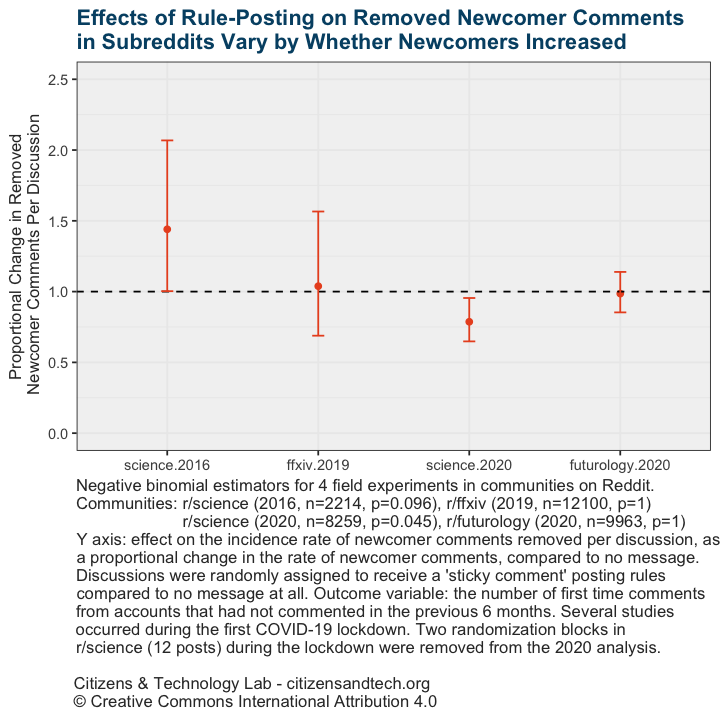

In [240]:
ggplot(h2.plot.df, aes(model.name, treat.estimate.irr)) +
    geom_point(color=chartpalette[1]) +
    geom_hline(yintercept=1, linetype="dashed") +
    geom_errorbar(ymin=h2.plot.df$treat.estimate.irr.lwr, 
                  ymax=h2.plot.df$treat.estimate.irr.upr,
                  width=0.08,color=chartpalette[1]) +
    ylim(0, 2.5)  +
    cat.theme +
    ylab("Proportional Change in Removed\n Newcomer Comments Per Discussion") +
    ggtitle(paste("Effects of Rule-Posting on Removed Newcomer Comments\n",
                  "in Subreddits Vary by Whether Newcomers Increased", sep="")) +
    xlab(paste("Negative binomial estimators for 4 field experiments in communities on Reddit.\n",
               "Communities: r/science (2016, n=",nrow(subset(meta.analysis.df, study=="science.2017")),
               ", p=",prettyNum(subset(science.2017.pvalues, hypothesis=="h2")$adjusted, digits=2), 
               "), r/ffxiv (2019, n=", nrow(subset(meta.analysis.df, study=="ffxiv.2019")),
               ", p=",prettyNum(subset(ffxiv.2019.pvalues, hypothesis=="h2")$adjusted, digits=2), 
               ")\n                       r/science (2020, n=", nrow(subset(meta.analysis.df, study=="science.2020")), 
               ", p=",prettyNum(subset(science.2020.pvalues, hypothesis=="h2")$adjusted, digits=2), 
               "), r/futurology (2020, n=", nrow(subset(meta.analysis.df, study=="futurology.2020")), 
               ", p=",prettyNum(subset(futurology.2020.pvalues, hypothesis=="h2")$adjusted, digits=2),
               ")\n", 
               "Y axis: effect on the incidence rate of newcomer comments removed per discussion, as\n",
               "a proportional change in the rate of newcomer comments, compared to no message.\n",
               "Discussions were randomly assigned to receive a 'sticky comment' posting rules\n", 
               "compared to no message at all. Outcome variable: the number of first time comments\n",
               "from accounts that had not commented in the previous 6 months. Several studies\n",
               "occurred during the first COVID-19 lockdown. Two randomization blocks in\n",
               "r/science (12 posts) during the lockdown were removed from the 2020 analysis.",
               end.caption.text,
               sep=""))


## H3: Newcomer Comments

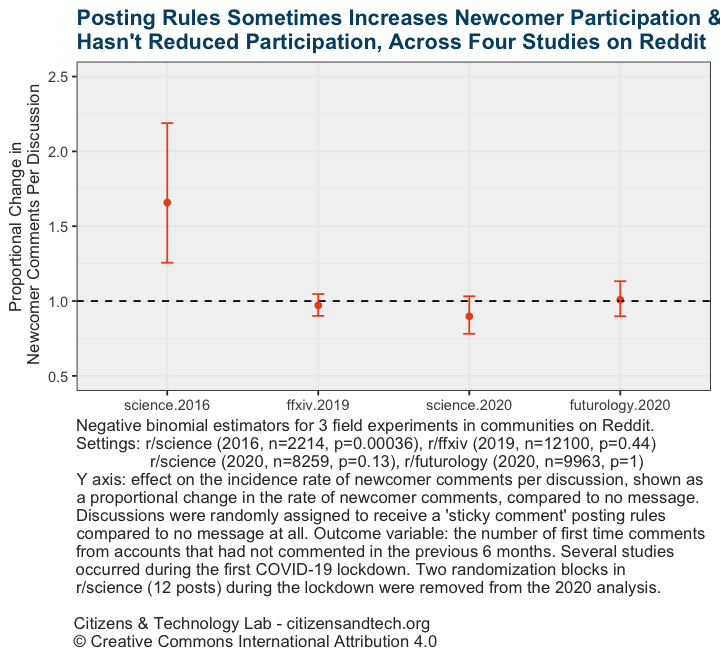

In [244]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

x.just = 1
h.just = 1


h3.plot <- 
    ggplot(h3.plot.df, aes(model.name, treat.estimate.irr)) +
        geom_point(color=chartpalette[1]) +
        geom_hline(yintercept=1, linetype="dashed") +
        geom_errorbar(ymin=h3.plot.df$treat.estimate.irr.lwr, 
                      ymax=h3.plot.df$treat.estimate.irr.upr,
                      width=0.08, color=chartpalette[1]) +
        ylim(0.5, 2.5) +
        cat.theme +
        theme(legend.position = "none") +
        ylab("Proportional Change in\n Newcomer Comments Per Discussion") +
        ggtitle(paste("Posting Rules Sometimes Increases Newcomer Participation &\n",
                      # nrow(meta.analysis.df)
                      "Hasn't Reduced Participation, Across Four Studies on Reddit", sep="")) +
        xlab(paste("Negative binomial estimators for 3 field experiments in communities on Reddit.\n",
                   "Settings: r/science (2016, n=",nrow(subset(meta.analysis.df, study=="science.2017")),
                   ", p=",prettyNum(subset(h3.plot.df, model.name=="science.2016")$treat.estimate.pvalue, digits=2), 
                   "), r/ffxiv (2019, n=", nrow(subset(meta.analysis.df, study=="ffxiv.2019")),
                   ", p=",prettyNum(subset(h3.plot.df, model.name=="ffxiv.2019")$treat.estimate.pvalue, digits=2), 
                   ")\n                r/science (2020, n=", nrow(subset(meta.analysis.df, study=="science.2020")), 
                   ", p=",prettyNum(subset(h3.plot.df, model.name=="science.2020")$treat.estimate.pvalue, digits=2),                    
                   "), r/futurology (2020, n=", nrow(subset(meta.analysis.df, study=="futurology.2020")), 
                   ", p=",prettyNum(subset(futurology.2020.pvalues, hypothesis=="h3")$adjusted, digits=2),
                   ")\n", 
                   "Y axis: effect on the incidence rate of newcomer comments per discussion, shown as\n",
                   "a proportional change in the rate of newcomer comments, compared to no message.\n",
                   "Discussions were randomly assigned to receive a 'sticky comment' posting rules\n", 
                   "compared to no message at all. Outcome variable: the number of first time comments\n",
                   "from accounts that had not commented in the previous 6 months. Several studies\n",
                   "occurred during the first COVID-19 lockdown. Two randomization blocks in\n",
                   "r/science (12 posts) during the lockdown were removed from the 2020 analysis.",
                   end.caption.text,
                   sep=""))
h3.plot

#annotate_figure(h3.plot,
#         annotation_custom(grob=logo.pngob, xmin=-1, xmax=2, ymin=-1, ymax=2))#, ymin=-0.90, xmin=0.7-(0.7*h.just), xmax=1-(0.7*h.just)))

### Total Comments Removed (not pre-registered, but included in case communities are interested)

In [194]:
h4.science.2017.m <- glm.nb(num.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="science.2017") )

h4.science.2020.m <- glm.nb(num.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="science.2020") )
h4.ffxiv.2019.m   <- glm.nb(num.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="ffxiv.2019") )

h4.futurology.2020.m   <- glm.nb(num.comments.removed ~ 
                                treatment + 
                                visible,
                                data=subset(meta.analysis.df, study=="futurology.2020") )


print(screenreg(list(h4.science.2017.m, h4.ffxiv.2019.m, h4.science.2020.m, h4.futurology.2020.m)))



h4.plot.df <- rbind(
    generate.result.table(h4.science.2017.m, "science.2017", "treatment", nrow(exp.posts.science.2017.df)),
    generate.result.table(h4.ffxiv.2019.m,   "ffxiv.2019",   "treatment", nrow(exp.posts.ffxiv.df)),
    generate.result.table(h4.science.2020.m, "science.2020", "treatment", nrow(exp.posts.science.2020.df)),
    generate.result.table(h4.futurology.2020.m, "futurology.2020", "treatment", nrow(exp.posts.futurology.df))

)



                Model 1       Model 2       Model 3        Model 4      
------------------------------------------------------------------------
(Intercept)         1.79 ***     -1.65 ***       2.70 ***       1.09 ***
                   (0.13)        (0.14)         (0.07)         (0.08)   
treatment           0.38 **       0.07          -0.29 ***      -0.00    
                   (0.14)        (0.08)         (0.07)         (0.05)   
visibleTrue         0.65 ***     -0.04           0.76 ***       0.84 ***
                   (0.15)        (0.14)         (0.07)         (0.08)   
------------------------------------------------------------------------
AIC              8040.26      10107.04       37985.92       39041.46    
BIC              8063.07      10136.64       38013.99       39070.29    
Log Likelihood  -4016.13      -5049.52      -18988.96      -19516.73    
Deviance         1574.80       2987.47        6789.50        8188.59    
Num. obs.        2214         12100           8259

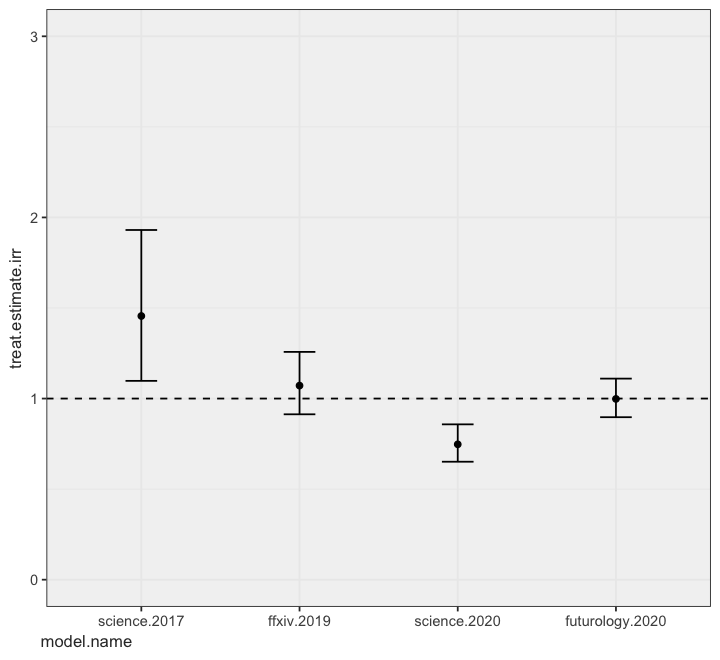

In [195]:
ggplot(h4.plot.df, aes(model.name, treat.estimate.irr)) +
    geom_point() +
    geom_hline(yintercept=1, linetype="dashed") +
    geom_errorbar(ymin=h4.plot.df$treat.estimate.irr.lwr, 
                  ymax=h4.plot.df$treat.estimate.irr.upr,
                  width=0.2) +
    ylim(0, 3) +
    cat.theme